## Sensor Fault Detection

### Problem Statement:

Heavy vehicles are widely used in industry to transport goods because they are economical and flexible. So as it is one of the primary types of vehicle for the transportation of goods, it costs a lot of money in case of a vehicle breakdown. A well-maintained vehicle is one of the keys to saving money and time.

One of the components that are critical to heavy vehicles is Air Pressure System (APS). It generates pressurized air with the help of an air compressor driven by the engine to be used for various components such as braking, gear changing, etc.

The task is to predict the probability of failure of the APS system based on the sensor data collected from the heavy vehicles. It helps reduce the maintenance cost and improve the efficiency of the vehicle. So the requirement is to minimize the false predictions.

### Cost-metric of miss-classification:


The total cost of a prediction model the sum of Cost_1 multiplied by the number of Instances with type 1 failure and Cost_2 with the number of instances with type 2 failure, resulting in a Total_cost. In this case Cost_1 refers to the cost that an unnessecary check needs to be done by an mechanic at an workshop, while Cost_2 refer to the cost of missing a faulty truck, which may cause a breakdown.

Total_cost = Cost_1 * No_Instances + Cost_2 * No_Instances

From the above problem statement we could observe that, we have to reduce false positives and false negatives. More importantly we have to reduce false negatives, since cost incurred due to false negative is 50 times higher than the false positives.


Dataset: https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks

### Data Description:

The dataset contains 60000 instances of data collected from heavy Scania trucks in everyday usage. The dataset consists of both categorical and numerical features. The data is collected from 170 different sensors. The data is collected from a total of 21 different types of failure modes. The data is collected from a total of 6 different types of sensors.

### Data Dictionary:

The data dictionary is provided in the dataset itself. The data dictionary is provided in the form of an excel file. The data dictionary contains the following information:

- Column Name
- Unit of Measurement
- Sensor Location
- Sensor Type
- Min Value
- Max Value
- Normal Range
- Sensor Failure Mode

#### Objectives:
- To perform Exploratory Data Analysis on the dataset.
- To perform feature engineering on the dataset.
- To perform feature selection on the dataset.
- To perform model building on the dataset.
- To perform model tuning on the dataset.
- To perform model evaluation on the dataset.

### Challenges:
- The dataset is highly imbalanced.
- The dataset contains a lot of missing values.
- Misclassification leads to unecessary repair costs.



### Import the required libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer

# import the modesl
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, f1_score, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')

### Read Data

In [21]:
# load csv file
df = pd.read_csv('D:\\Github\\Sensor-Fault-Detection\\data\\aps_failure_training_set.csv', na_values = 'na')
test_set = pd.read_csv('D:\\Github\\Sensor-Fault-Detection\\data\\aps_failure_test_set.csv', na_values = 'na')

In [22]:
# check the shape of the data
print(df.shape)

(60000, 171)


In [23]:
# check the first 5 rows of the data
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [24]:
# check unique values in each column
df.nunique()

class         2
aa_000    22095
ab_000       29
ac_000     2061
ad_000     1886
          ...  
ee_007    30469
ee_008    24213
ee_009     9724
ef_000       28
eg_000       49
Length: 171, dtype: int64

In [25]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print("There are {} numeric features in train data: {}".format(len(numeric_features), numeric_features))
print("\nThere are {} categorical features in train data: {}".format(len(categorical_features), categorical_features))

There are 170 numeric features in train data: ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_0

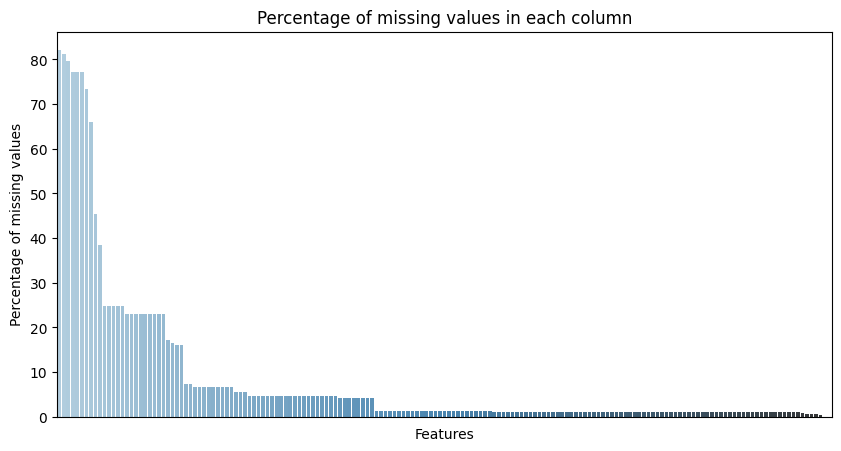

In [26]:
# check the number of missing values in each column
missing = df.isnull().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending=False)

# plot the missing values
plt.figure(figsize=(10, 5))
sns.barplot(x=missing.index, y=missing.values.T[0], palette='Blues_d')
plt.xticks([])
plt.xlabel('Features')
plt.ylabel('Percentage of missing values')
plt.title('Percentage of missing values in each column')
plt.show()

In [27]:
# drop the columns with more than 70% missing values
drop_columns = missing[missing[0] > 70].index
drop_columns

Index(['br_000', 'bq_000', 'bp_000', 'bo_000', 'ab_000', 'cr_000', 'bn_000'], dtype='object')

In [28]:
df.drop(list(drop_columns), axis=1, inplace=True)

In [29]:
# check the shape of dataset after dropping columns
df.shape

(60000, 164)

In [30]:
# check the percentage of missing values in each column
missing = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing.sum()
percent_missing = (total_missing/total_cells) * 100

print("The percentage of missing values in the dataset is: {}".format(percent_missing))

The percentage of missing values in the dataset is: 5.29765243902439


#### Visualization of unique values in Target variable

The percentage of positive class is 1.6666666666666667
The percentage of negative class is 98.33333333333333


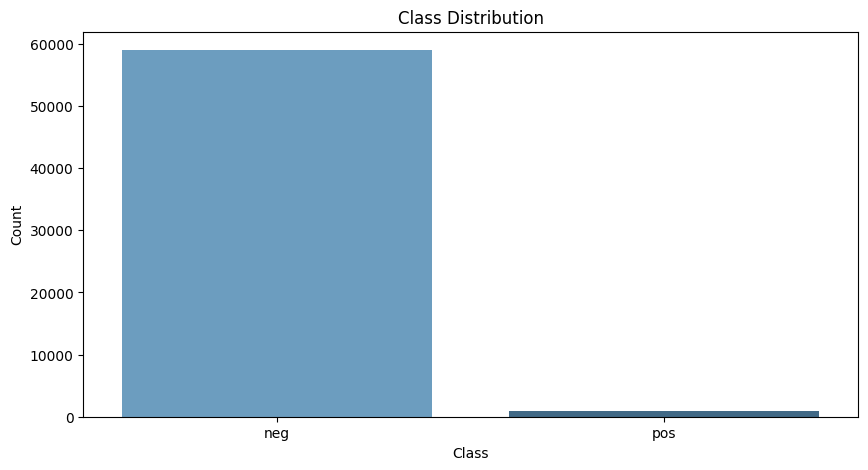

In [31]:
pos = (sum(df['class'] == 'pos')/len(df['class'].index))*100
neg = (sum(df['class'] == 'neg')/len(df['class'].index))*100

print('The percentage of positive class is', pos)
print('The percentage of negative class is', neg)

# plot the class distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='class', data=df, palette='Blues_d')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

##### Observation:
- The dataset is highly imbalanced.
- If we build a model with this dataset, it will be biased towards the majority class.
- We need to perform sampling techniques to balance the dataset.

#### Functions for model training and evaluation

In [32]:
# Performance metrics function
def performance_metrics(y_true, y_pred):
    print('Accuracy: ', accuracy_score(y_true, y_pred))
    print('Confusion Matrix: ', confusion_matrix(y_true, y_pred))
    print('Classification Report: ', classification_report(y_true, y_pred))
    print('ROC AUC Score: ', roc_auc_score(y_true, y_pred))
    print('ROC Curve: ', roc_curve(y_true, y_pred))
    print('AUC: ', auc(y_true, y_pred))
    print('F1 Score: ', f1_score(y_true, y_pred))
    print('Precision Score: ', precision_score(y_true, y_pred))
    print('Recall Score: ', recall_score(y_true, y_pred))

In [33]:
# Cost function
def cost(y_true, y_pred):
    cost = 0
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 0:
            cost += 10
        elif y_true[i] == 0 and y_pred[i] == 1:
            cost += 500
    return cost

In [34]:
# Model evaluation function
def model_evaluation(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    

    print('Train Performance Metrics')
    print('cost = ', cost(y_train, y_train_pred))
    performance_metrics(y_train, y_train_pred)

    print('Test Performance Metrics')
    print('cost = ', cost(y_test, y_test_pred))
    performance_metrics(y_test, y_test_pred)

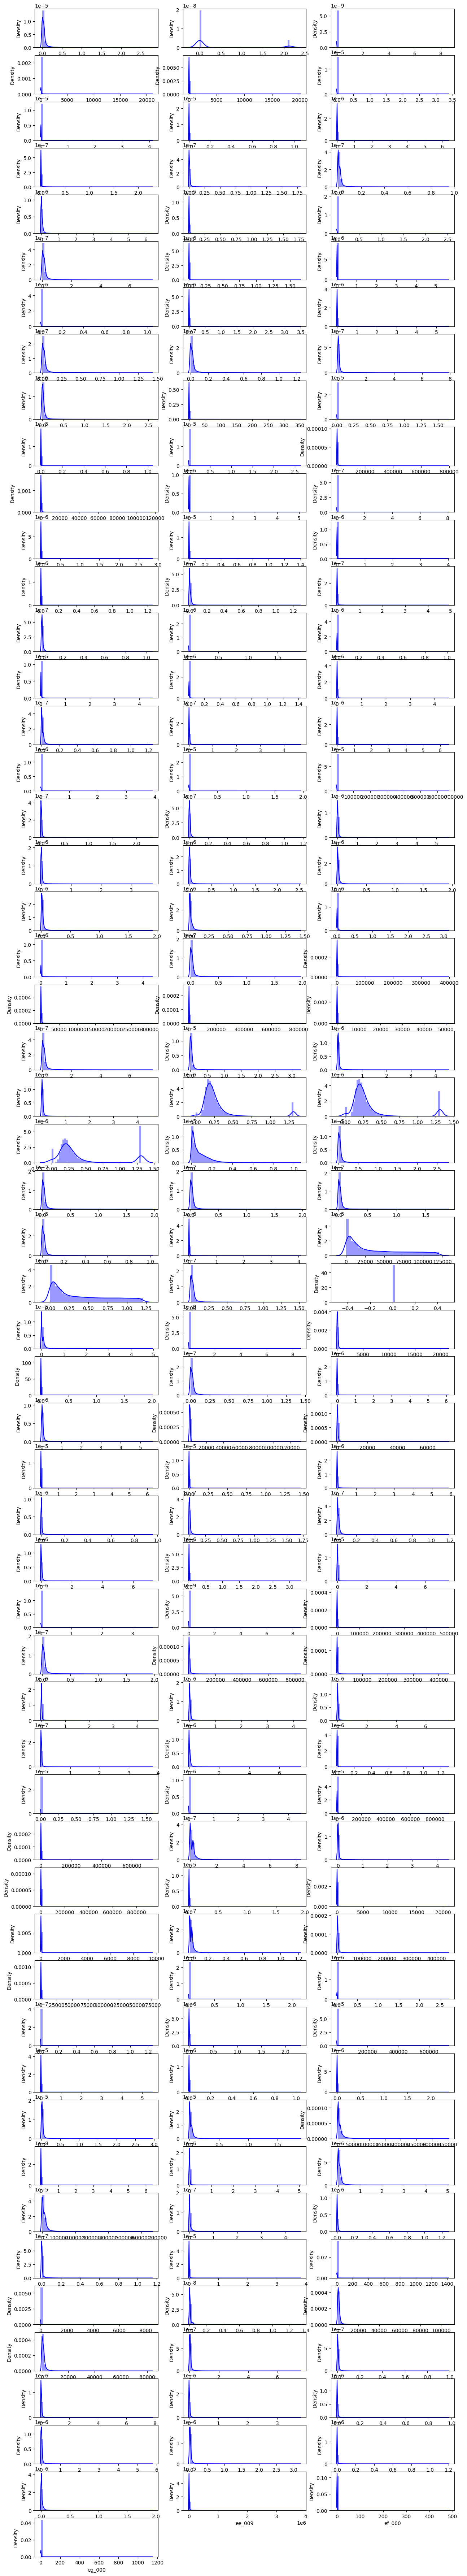

In [35]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

# plot distrubution of numeric features
plt.figure(figsize=(15, 100))
for i, feature in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(df[feature], color='blue')
    plt.xlabel(feature)
plt.show()

### Handling Imbalanced Dataset


In [36]:
# Split the data into train and test
X = df.drop('class', axis=1)
y = df['class']

In [37]:
# encode the target variable
y = y.replace({'neg': 0, 'pos': 1})

In [38]:
models = {"Logistic Regression": LogisticRegression(), "Decision Tree": DecisionTreeClassifier(), "Random Forest": RandomForestClassifier(), "XGBoost": XGBClassifier(), "LightGBM": LGBMClassifier(), "AdaBoost": AdaBoostClassifier(), "Gradient Boosting": GradientBoostingClassifier(), "Support Vector Machine": SVC(), "K-Nearest Neighbors": KNeighborsClassifier(), "Gaussian Naive Bayes": GaussianNB(), "Linear Discriminant Analysis": LinearDiscriminantAnalysis(), "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis()}

#### Impute using SimpleImputer with straegy as median

In [40]:
# fit the simple imputer with median strategy
simple_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', RobustScaler())])

# transform the data
X_simple = simple_pipeline.fit_transform(X)

# resample the data using SMOTE
sm = SMOTETomek(random_state=42, sampling_strategy='minority')

# fit the data
X_sm, y_sm = sm.fit_resample(X_simple, y)

# training the model
for model in models.keys():
    print(model)
    model_evaluation(model, X_sm, y_sm, X_simple, y)

TypeError: 'builtin_function_or_method' object is not iterable

In [ ]:
report_median

: 

#### Observations:


### Impute using SimpleImputer with strategy as mean

In [ ]:
# create a pipeline for imputing missing values with mean strategy
mean_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('scaler', RobustScaler())])

# transform the data
X_mean = mean_pipeline.fit_transform(X)

# resample the data using SMOTE
sm = SMOTETomek(random_state=42, sampling_strategy='minority')

# fit the data
X_sm, y_sm = sm.fit_resample(X_mean, y)

# training the model
report_mean = model_evaluation(X_sm, y_sm)

: 

In [ ]:
report_mean

: 

### Impute using SimpleImputer with strategy as constant

In [ ]:
# create a pipeline with strategy constant
constant_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value=0)), ('scaler', RobustScaler())])

# transform the data
X_constant = constant_pipeline.fit_transform(X)

# resample the data using SMOTE
sm = SMOTETomek(random_state=42, sampling_strategy='minority')

# fit the data
X_sm, y_sm = sm.fit_resample(X_constant, y)

# training the model
report_constant = model_evaluation(X_sm, y_sm)

: 

In [ ]:
report_constant

: 

#### Observations:


### Impute using KNNImputer

In [ ]:
# create a pipeline with KNN imputer
knn_pipeline = Pipeline(steps=[('imputer', KNNImputer(n_neighbors=5)), ('scaler', RobustScaler())])

# transform the data
X_knn = knn_pipeline.fit_transform(X)

# resample the data using SMOTE
sm = SMOTETomek(random_state=42, sampling_strategy='minority')

# fit the data
X_sm, y_sm = sm.fit_resample(X_knn, y)

# training the model
report_knn = model_evaluation(X_sm, y_sm)

: 

In [ ]:
report_knn

: 

### Principal Component Analysis with imputed data

In [ ]:
from sklearn.decomposition import PCA

# create a pipeline with PCA
pca_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', RobustScaler()), ('pca', PCA(n_components=0.95))])

# transform the data
X_pca = pca_pipeline.fit_transform(X)

# resample the data using SMOTE
sm = SMOTETomek(random_state=42, sampling_strategy='minority')

# fit the data
X_sm, y_sm = sm.fit_resample(X_pca, y)

# training the model
report_pca = model_evaluation(X_sm, y_sm)

: 

In [ ]:
report_pca

: 

: 